In [1]:
import pandas as pd
import numpy as np

In [2]:
def nunique_values(data):
    for x in list(data.columns):
        print(x)
        print(data[x].nunique())
        print('\n')
    
    
def unique_values(data):  
    for x in list(data.columns):
        print(x)
        print(data[x].unique())
        print('\n')
        
def maxmin(data,columns):
    for x in columns:
        print(x)
        print('max value: ', data[x].max())
        print('min value: ', data[x].min())
        print('\n')
    

In [3]:
data = pd.read_csv(r"C:\Users\leube\Downloads\users-by-social-media-platform.csv")
data

,Entity,Year,Monthly active users (Statista and TNW (2019))
0,Facebook,2008,100000000
1,Facebook,2009,276000000
2,Facebook,2010,517750000
3,Facebook,2011,766000000
4,Facebook,2012,979750000
...,...,...,...
137,YouTube,2014,1249451725
138,YouTube,2015,1328133360
139,YouTube,2016,1399053600
140,YouTube,2017,1495657000


In [4]:
data.info()
# no missing values, all column types are ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Entity                                          142 non-null    object
 1   Year                                            142 non-null    int64 
 2   Monthly active users (Statista and TNW (2019))  142 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [5]:
nunique_values(data)

Entity
19


Year
18


Monthly active users (Statista and TNW (2019))
135




In [6]:
unique_values(data)

Entity
['Facebook' 'Flickr' 'Friendster' 'Google Buzz' 'Google+' 'Hi5'
 'Instagram' 'MySpace' 'Orkut' 'Pinterest' 'Reddit' 'Snapchat' 'TikTok'
 'Tumblr' 'Twitter' 'WeChat' 'Weibo' 'Whatsapp' 'YouTube']


Year
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2004 2005
 2006 2007 2002 2003]


Monthly active users (Statista and TNW (2019))
[ 100000000  276000000  517750000  766000000  979750000 1170500000
 1334000000 1516750000 1753500000 2035750000 2255250000 2375000000
    3675135    7399354   14949270   29299875   30000000   41834525
   54708063   66954600   79664888   80000000    3000000    4470000
    5970054    7459742    8989854   24253200   51008911   28804331
  166029650  170000000  107319100  205654700  254859015  298950015
  398648000  495657000  430000000    9731610   19932360   29533250
   55045618   57893524   59953290   46610848  117500000  250000000
  400000000  550000000  750000000 1000000000     980036   19490059
   54763260   69299875   72408233   70133095  

In [17]:
maxmin(data,['Year'])

Year
max value:  2019
min value:  2002




In [8]:
usersbyyears = data.groupby(by='Year').agg({'Monthly active users (Statista and TNW (2019))':'sum'})
usersbyyear = usersbyyears.copy()
usersbyyear.rename(columns={'Monthly active users (Statista and TNW (2019))':'average_monthly_visits'},inplace=True)

In [16]:
usersbyyear

,Year,average_monthly_visits
0,2002,3000000
1,2003,4470000
2,2004,15525405
3,2005,55892892
4,2006,133727481
5,2007,323723343
6,2008,649259280
7,2009,939537344
8,2010,1459764216
9,2011,1975107328


In [10]:
usersbyyear.to_csv(r'C:\Users\leube\Ironhack\Ironprojects\Module_3\final_project\clean_data\sc_cleaned.csv')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
usersbyyear.drop(usersbyyear[usersbyyear['Year']==2019].index,inplace=True)

In [12]:
usersbyyear.reset_index(inplace=True)

<AxesSubplot:xlabel='Year', ylabel='average_monthly_visits'>

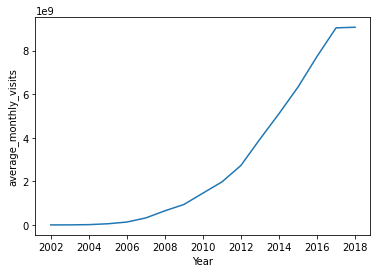

In [15]:
sns.lineplot(data=usersbyyear,x='Year',y='average_monthly_visits')